In [124]:
#in this project we will be implementing a naive bayes classifier on the iris dataset from scratch without the use of any existing libraries
#first we will import the iris dataset
#we then split the dataset for training and testing (we will use 0.20 sample size for testing and 0.80 for training as per the instructions)
#we then shuffle the dataset by the use of the random function in python
#we will then load our training dataset on the naive bayes classifier algorithm to train our model
#we then do a prediction 
#lastly we can test the accuracy of our model as well as getting some metrics from our NBC model perfomance

In [125]:
#loading  the iris dataset
from sklearn.datasets import load_iris
iris=load_iris()
X,y =iris['data'] , iris['target']

In [126]:
len(X)

150

In [127]:
len(y)

150

In [128]:
#lets import the numpy library
import numpy as np

#shuffling the dataset for better and improved models perfomance
N ,D =X.shape
Ntrain=int(0.8*N)
shuffler=np.random.permutation(N)
X_train=X[shuffler[:Ntrain]]
y_train=y[shuffler[:Ntrain]]
X_test=X[shuffler[Ntrain:]]
y_test=y[shuffler[Ntrain:]]

In [129]:
X_train.shape

(120, 4)

In [130]:
len(y_train)

120

In [131]:
X_test.shape

(30, 4)

In [132]:
y_test

array([0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 0, 0, 2, 2, 2, 2])

In [133]:
#next up is building the naive bayes classifier algorithm from scratch

In [134]:
#importing numpy library to help on building our NBC class algorithm

class NaiveBayes:

#defining the fit method
  def fit(self,X,y) :# where X will be a numpy array and y will be the vectorizer
    number_of_samples,number_of_features=X.shape  # number_of_samples are the rows whilest number_of_features are the columns
    self._classes=np.unique(y) #this line of code creates a unique modefied classes
    n_classes=len(self._classes)

    #next we now need to find the variance mean ,prior values for every class
    self._mean=np.zeros((n_classes,number_of_features),dtype=np.float64)
    self._variance=np.zeros((n_classes,number_of_features),dtype=np.float64)
    self._priors=np.zeros(n_classes,dtype=np.float64)

    #running a for loop for integrating the classes
    for index,t in enumerate(self._classes):
      X_of_t=X[y==t]
      self._mean[index, :]=X_of_t.mean(axis=0)
      self._variance[index, :] =X_of_t.var(axis=0)
      self._priors[index]=X_of_t.shape[0]/float(number_of_samples)


  #coding the prediction method
  def predict(self,X):
    #we use a list comprehension to write the y_prediction values
    y_prediction=[self._predict(x) for x in X] 
    return np.array(y_prediction)


  #coding the pdf method to intergrate all classes mean,variance ,numerator and denomiator values
  def _pdf(self,class_index,x):
    mean_val=self._mean[class_index]
    variance_val=self._variance[class_index]
    numerator_val=np.exp(- (x-mean_val)**2 / (2 * variance_val))
    denominator_val=np.sqrt(2 * np. pi * variance_val)
    return numerator_val / denominator_val   


  #coding the probablity prediction method
  def _predict(self,X):
    posteriors_values=[] #our target is to choose the maximum value from this list created over here
    
    #next we create a prosterior probablity for every class stated
    #so we run a for loop to intergrate through the number of our classes
    for index ,t in enumerate(self._classes):
      prior_val=np.log(self._priors[index])
      posterior_val=np.sum(np.log(self._pdf(index,X)))
      posterior_val=prior_val + posterior_val
      posteriors_values.append(posterior_val)

    #lastly we only return the class which has the highest probablity of posterior by using the numpy argmax function
    return self._classes[np.argmax(posteriors_values)]



In [135]:
#next we gonna code the function to determine the accuracy of our models perfomance
def accuracy(y_true,y_predicted):
  accuracy=np.sum(y_true==y_predicted) / len (y_true)
  return accuracy

In [136]:
#now that our Naive Bayes Classifier algorithm is looking pretty good,we now gonna create an object of the NaiveBayes class
model=NaiveBayes()


In [137]:
#now we gonna train our model by calling the fit method in our NBC class implemented above
model.fit(X_train,y_train)

In [138]:
model.predict(X_test)

array([0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 0, 0, 2, 2, 2, 2])

In [139]:
##creating some predictions using the values above so we can compare the accuracy of our model on the test dataset to the true target y values

predictions= model.predict(X_test)
predictions[:10]

array([0, 2, 1, 1, 0, 0, 0, 0, 2, 1])

In [140]:
#lets compare the predictions values to the y test true values
y_test[:10]

array([0, 2, 1, 1, 0, 0, 0, 0, 2, 1])

In [141]:
#booooom!!!,you can see that our naive bayes classifier is perfoming pretty great,almost predicting all the values correctly
#lets now see our models accuracy using our predefined 'accuracy' function above
accuracy(y_test,predictions)

1.0

In [142]:
#there we go....,96% accuracy is pretty great,our models implementation is working as expected...

In [143]:
#lets see also how probablity prediction method is doing on our iris dataset 
model._predict(X_test)

1

In [144]:
#see that its 100% accurate,meaning our model is doing pretty good


In [145]:
print(f'Naive Bayes Classifier has an accuracy of := {round(accuracy(y_test,predictions),2)}')

Naive Bayes Classifier has an accuracy of := 1.0


In [146]:
#lastly now we can print the classification report to see the models overall metrics
#for that we can use the sklearn metrics function
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,predictions)

Text(33.0, 0.5, 'Truth')

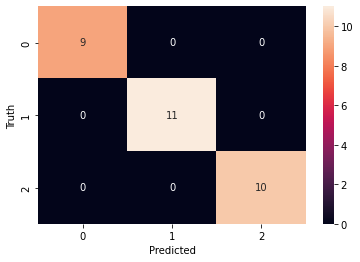

In [147]:
#using seaborn library for a better visualization
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [148]:
#the interpretation of the above report is that:
#1. 12 times the true value was 0 ,and the our NBC model predicted accurately to be 0
#2. 9 times the true value was 1 ,and the our NBC model predicted accurately to be 1
#3. 8 times the true value was 2 ,and the our NBC model predicted accurately to be 2
#4. so only once the true value was 2 ,but the our NBC model predicted wrongly to be 1
#OVERALLY OUR NBC BASED MODEL IS PERFORMING PRETTY GOOD


In [149]:
#next we gonna print the classification report
print(f'Naive Bayes Classier Report {classification_report(y_test,predictions)}')

Naive Bayes Classier Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



END OF THE NAIVE BAYES CLASSIFIER ALGORITHM IMPLEMENTATION AND TESTING.
